In [23]:
import bs4 as bs
import re
import nltk
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [249]:

file = ('C:\\NUS\\Y4S1\\DSA4262\\skindiagnosis\\data\\scraped_data.csv')
df = pd.read_csv(file, encoding='latin-1') 
# data = np.array(df.Symptoms)
# titles = np.array(df.Disease)
selected_rows = ['Atopic Dermatitis', 'Scabies Lyme Diease and other Infestations and Bites', 'Benign Tumors', 'Atopic Dermatitis']
selecteddf = df[df['Disease'].isin(selected_rows)]

symptoms = np.array(selecteddf.Symptoms)
titles = np.array(selecteddf.Disease)

# num_rows = selecteddf.shape[0]
# num_rows


In [199]:
from gensim.models import Word2Vec, Doc2Vec
import gensim
from collections import namedtuple
import string
from langdetect import detect

In [200]:
SentimentDocument = namedtuple('SentimentDocument', 'words tags title original_number')
n=0
alldocs = []  # Will hold all docs in original order

regex = re.compile('[%s]' % re.escape(string.punctuation)) #to remove punctuation

for line_no, line in enumerate(data):
    if (type(line)==str):
        if (len(line)>150):
            if (detect(line) == 'en') :
                line = regex.sub('', line)
                tokens = gensim.utils.to_unicode(line).lower().split()
                words = tokens[0:]
                tags = [n]
                title = titles[line_no]
                alldocs.append(SentimentDocument(words, tags, title, line_no))
                n=n+1    

Number of Documents :  295
Mean length of documents :  146.3186440677966


Text(0, 0.5, 'Length of the description')

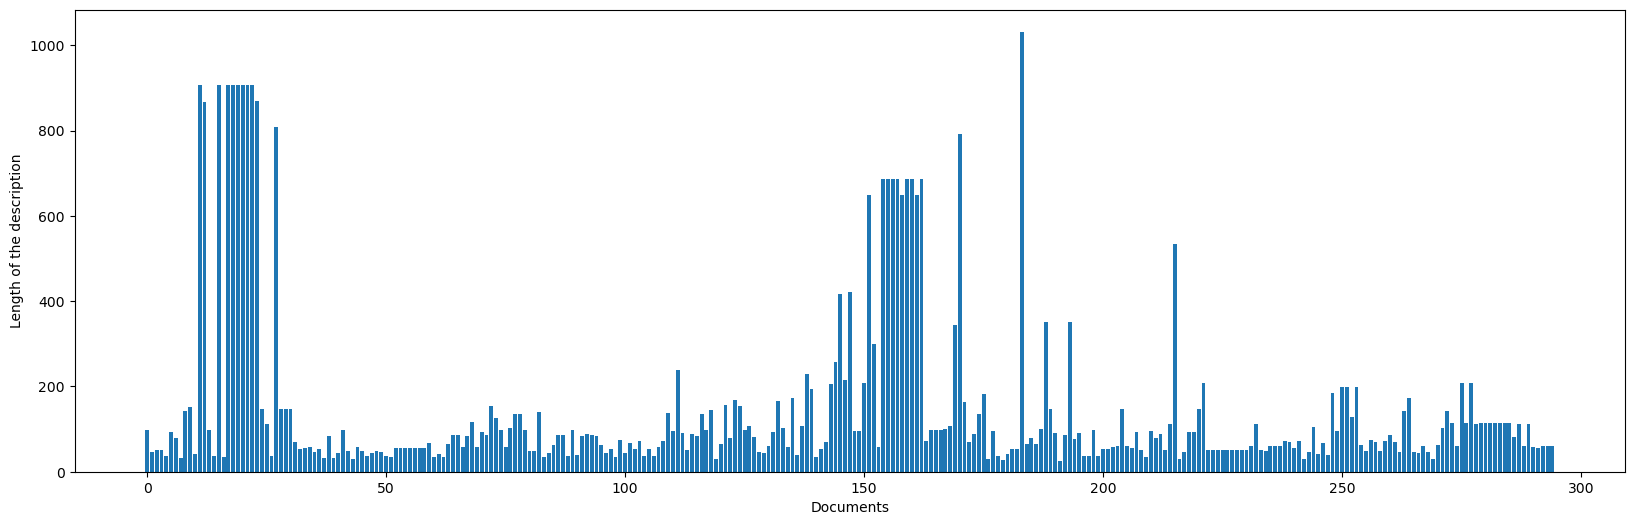

In [201]:
l = []
for doc in alldocs:
    l.append(len(doc.words))

print('Number of Documents : ', len(alldocs))
print('Mean length of documents : ', np.mean(l))

plt.figure (figsize=(20, 6))
plt.bar(range(0, len(l)), l)
plt.xlabel('Documents')
plt.ylabel('Length of the description')

In [202]:
index = 0
doc = alldocs[index]
print(doc, '\n')
print(symptoms[doc.original_number])

SentimentDocument(words=['a', 'round', 'or', 'ovalshaped', 'waxy', 'or', 'rough', 'bump', 'typically', 'on', 'the', 'face', 'chest', 'a', 'shoulder', 'or', 'the', 'back', 'a', 'flat', 'growth', 'or', 'a', 'slightly', 'raised', 'bump', 'with', 'a', 'scaly', 'surface', 'with', 'a', 'characteristic', 'pasted', 'on', 'look', 'varied', 'size', 'from', 'very', 'small', 'to', 'more', 'than', '1', 'inch', '25', 'centimeters', 'across', 'varied', 'number', 'ranging', 'from', 'a', 'single', 'growth', 'to', 'multiple', 'growths', 'very', 'small', 'growths', 'clustered', 'around', 'the', 'eyes', 'or', 'elsewhere', 'on', 'the', 'face', 'sometimes', 'called', 'flesh', 'moles', 'or', 'dermatosis', 'papulosa', 'nigra', 'common', 'on', 'black', 'or', 'brown', 'skin', 'varied', 'in', 'color', 'ranging', 'from', 'light', 'tan', 'to', 'brown', 'or', 'black', 'itchiness'], tags=[0], title='Benign Tumors', original_number=0) 

A round or oval-shaped waxy or rough bump, typically on the face, chest, a should

In [203]:
# Creating and training Doc2Vec Model
from gensim.models import Word2Vec, Doc2Vec

model = Doc2Vec(dm=1, vector_size=300,window=10,hs=0,min_count=10,dbow_words=1,sample=1e-5)

# build the vocabulary 
model.build_vocab(alldocs)
model.train(alldocs, total_examples=model.corpus_count, epochs=100, start_alpha=0.01, end_alpha=0.01)

In [204]:
# Save and load models
model.save("model")
# Doc2Vec.load("model")

In [205]:
model.wv.most_similar_cosmul(positive = ["patches"])

[('scaly', 0.9998372197151184),
 ('ears', 0.9998176097869873),
 ('fluid', 0.9998161792755127),
 ('over', 0.9998111128807068),
 ('clear', 0.9998068809509277),
 ('dark', 0.9998061060905457),
 ('loss', 0.9998048543930054),
 ('painless', 0.9997990131378174),
 ('gray', 0.9997916221618652),
 ('usually', 0.9997905492782593)]

In [206]:
model.wv.most_similar_cosmul(positive = ["fever"])

[('bacteria', 0.999754786491394),
 ('other', 0.9997518062591553),
 ('having', 0.9997414350509644),
 ('weak', 0.9997400045394897),
 ('had', 0.9997206330299377),
 ('this', 0.999718189239502),
 ('seborrheic', 0.9997162818908691),
 ('allergies', 0.9997159242630005),
 ('function', 0.9997154474258423),
 ('has', 0.9997137784957886)]

In [207]:
#Creating Class Labels
text_data = selecteddf['Symptoms']

symptom_to_disease = {}

# Iterate through the rows of the DataFrame and create the mapping
for index, row in selecteddf.iterrows():
    symptom = row['Symptoms']  # Assuming 'Symptoms' is the column containing symptoms
    disease = row['Disease']   # Assuming 'Disease' is the column containing disease names
    symptom_to_disease[symptom] = disease

# Print the created mapping
print(symptom_to_disease)

class_labels = [symptom_to_disease[symptom] for symptom in text_data]
class_labels

{'A round or oval-shaped waxy or rough bump, typically on the face, chest, a shoulder or the back\nA flat growth or a slightly raised bump with a scaly surface, with a characteristic "pasted on" look\nVaried size, from very small to more than 1 inch (2.5 centimeters) across\nVaried number, ranging from a single growth to multiple growths\nVery small growths clustered around the eyes or elsewhere on the face, sometimes called flesh moles or dermatosis papulosa nigra, common on Black or brown skin\nVaried in color, ranging from light tan to brown or black\nItchiness\n': 'Benign Tumors', '\nA small, round bump under the skin, usually on the face, neck or trunk\nA tiny blackhead plugging the central opening of the cyst\nA thick, yellow, smelly material that sometimes drains from the cyst\nRedness, swelling and tenderness in the area, if inflamed or infected\n': 'Benign Tumors', 'yellowish or flesh-colored bumps on the skin. These bumps are shiny and usually on the face, especially the fore

['Benign Tumors',
 'Benign Tumors',
 'Benign Tumors',
 'Benign Tumors',
 'Scabies Lyme Diease and other Infestations and Bites',
 'Scabies Lyme Diease and other Infestations and Bites',
 'Scabies Lyme Diease and other Infestations and Bites',
 'Scabies Lyme Diease and other Infestations and Bites',
 'Scabies Lyme Diease and other Infestations and Bites',
 'Scabies Lyme Diease and other Infestations and Bites',
 'Scabies Lyme Diease and other Infestations and Bites',
 'Scabies Lyme Diease and other Infestations and Bites',
 'Scabies Lyme Diease and other Infestations and Bites',
 'Scabies Lyme Diease and other Infestations and Bites',
 'Scabies Lyme Diease and other Infestations and Bites',
 'Scabies Lyme Diease and other Infestations and Bites',
 'Scabies Lyme Diease and other Infestations and Bites',
 'Atopic Dermatitis',
 'Atopic Dermatitis',
 'Atopic Dermatitis',
 'Atopic Dermatitis',
 'Atopic Dermatitis',
 'Atopic Dermatitis',
 'Atopic Dermatitis',
 'Atopic Dermatitis',
 'Atopic De

In [253]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(text_data, class_labels , test_size=0.2, random_state=42)

# Text vectorization using TF-IDF
tfidf_vectorizer = CountVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
print("X_train_tfidf shape:", X_train_tfidf.shape)

# Train a Logistic Regression model
# classifier = LogisticRegression()
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = classifier.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

ValueError: np.nan is an invalid document, expected byte or unicode string.

In [145]:
model = Doc2Vec(dm=1, vector_size=300, window=5, min_count=5, sample=1e-5)

# Apply data preprocessing, such as removing stopwords and stemming/lemmatization
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    words = text.lower().split()
    words = [word for word in words if word not in stop_words]
    words = [stemmer.stem(word) for word in words]
    return " ".join(words)

tokens = ["A round or oval-shaped waxy or rough bump", "A flat growth or a slightly raised bump with a scaly surface",
          "Varied size, from very small to more than 1 inch (2.5 centimeters) Varied number, ranging from a single growth to multiple growths Very small growths clustered around the eyes or elsewhere on the face, sometimes called flesh moles or dermatosis papulosa nigra, common on Black or brown skin Varied in color, ranging from light tan to brown or black Itchiness"]

processed_tokens = [preprocess_text(token) for token in tokens]

# Train the model with the adjusted parameters
model.build_vocab(alldocs)
model.train(alldocs, total_examples=model.corpus_count, epochs=100, start_alpha=0.01, end_alpha=0.01)

# Infer the document vector for processed tokens
new_vector = model.infer_vector(processed_tokens, alpha=0.001, epochs=20)

# Find the top N most similar documents
N = 5  # Adjust N as needed
most_similar_documents = model.docvecs.most_similar([new_vector], topn=N)

# Print the titles and distances of the most similar documents
for tag, distance in most_similar_documents:
    doc_similar = alldocs[tag]
    print("Disease:", doc_similar.title)
    print("Similarity:", distance)
    print("Symptoms:", symptoms[doc_similar.original_number])
    print("\n")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ziyuu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Disease: Atopic Dermatitis
Similarity: 0.007670049089938402
Symptoms: The main symptom of ichthyosis is very dry, scaly skin that may also be thick and rough.It usually affects large areas of the body including the arms, legs, torso, ears, face, or the whole body.The symptoms are often there from birth, but they can also appear after a few months or years. Sometimes the symptoms appear later in life because of another health condition, or from taking certain medicines.Ichthyosis can sometimes have more severe symptoms, including:blistered skina thin yellow, shiny layer on the skin at birth that dries out and flakes offhair losstight skin which can make moving the affected area painfulskin infectionssweating less, which can lead to overheatingproblems with hearing or eyesight


Disease: Atopic Dermatitis
Similarity: 0.007125639822334051
Symptoms: Itching, which may be mild or very severe
Dry, scaly skin patches
Small bumps that open and ooze (weep) a clear fluid when scratched
Skin redn

c:\Users\ziyuu\anaconda3\envs\NUS\lib\site-packages\ipykernel_launcher.py:32: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).


In [143]:
tokens = ["A round or oval-shaped waxy or rough bump", "A flat growth or a slightly raised bump with a scaly surface"]

# Infer the document vector
new_vector = model.infer_vector(tokens, alpha=0.001, epochs=20)

# Find the top N most similar documents
N = 5  # Adjust N as needed
most_similar_documents = model.docvecs.most_similar([new_vector], topn=N)

# Print the titles and distances of the most similar documents
for tag, distance in most_similar_documents:
    doc_similar = alldocs[tag]
    print("Disease:", doc_similar.title)
    print("Similarity:", distance) # 0 means perfect similarity, 1 is completely not similar
    print("Symptoms:", symptoms[doc_similar.original_number])
    print("\n")

Disease: Atopic Dermatitis
Similarity: 0.1080227717757225
Symptoms: Atopic eczemaÂ causes the skin to become itchy, dry, cracked and sore.Some people only have small patches of dry skin, but others may experience widespread inflamed skin all over the body.Inflamed skin can look red on white skin, and darker brown, purple or grey on brown and black skin. This means it may also be more difficult to see on brown and black skin.Although atopic eczema can affect any part of the body,Â it most often affects the hands, insides of the elbows, backs of the knees and the face and scalp in children.People with atopic eczema usuallyÂ have periods when symptoms are less noticeable, as well as periods when symptoms become more severe (flare-ups).


Disease: Benign Tumors
Similarity: 0.10459422320127487
Symptoms: The growths can:

Be slightly raised from the surrounding skin
Be white or light tan in appearance, which may darken to brown or black
Have a waxy, pasted-on look
Look scaly or like a wart
B

c:\Users\ziyuu\anaconda3\envs\NUS\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  


In [28]:
try:
    import string
    from nltk.corpus import stopwords
    import nltk
except Exception as e:
    print(e)

class PreProcessText(object):
    def __init__(self):
        pass
    def __remove_punctuation(self,text):
        message = []
        for x in text: 
            if x in string.punctuation:
                pass
            else:
                message.append(x)
        message = ''.join(message)
        return message 
    
    def __remove_stopwords(self , text):
        words = []
        for x in text.split():
            if x.lower() in stopwords.words():
                pass
            else:
                words.append(x)
        return words 
    
        print(words)
    
    def token_words(self, text = ''): #takes string, return token also called list of words that is used to train the model 
        message = self.__remove_punctuation(text)
        words = self.__remove_stopwords(message)
        return words



    

In [26]:
import nltk
flag = nltk.download("stopwords")
if (flag == "False" or flag == False):
    print("Failed to Download stop words")
else: 
    print("Downloaded Stop words")
    helper = PreProcessText()
    words = helper.token_words(text=df)

Downloaded Stop words
0       Batches of welts (wheals) that can arise anywh...
1       Raised, inflamed lines where you scratched.\nW...
2       Welts that form in minutes to hours\nSwelling,...
3       A round or oval-shaped waxy or rough bump, typ...
4       \nA small, round bump under the skin, usually ...
                              ...                        
2386                                                  NaN
2387                                                  NaN
2388                                                  NaN
2389                                                  NaN
2390                                                  NaN
Name: Symptoms, Length: 2391, dtype: object


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ziyuu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from gensim.models import Word2Vec

c:\Users\ziyuu\anaconda3\envs\NUS\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [3]:
model = Word2Vec([words], size = 100, window = 5, min_count = 1, workers = 4)

NameError: name 'words' is not defined